In [69]:
#install.packages("foreach")
#install.packages("RSpectra")
#install.packages("devtools")
#devtools::install_github("bcm-uga/lfmm")
library(lfmm)
library(RSpectra)
library(sys)

```bash
### recode vcf to snp 0 1 2 alleles
./../plink --file cv_maxmissing0.5_2 --recode 12 --out bbd --allow-extra-chr

```

In [70]:
setwd("/home/fascue/Documentos/Cav/snp/") # set working directory

In [71]:
comand <- "./vcf2matrix -v cv_maxmissing0.5.recode.vcf -n 40 -o matrix"
system(comand)

In [77]:
mm <- read.table("matrix.tsv", header = TRUE)
matriz <- mm[,c(4:43)]
matriz <- gsub(".","0", as.matrix(matriz), fixed = TRUE)
matriz <- as.data.frame(matriz)

In [78]:
for( i in 1:40){
    matriz[,i] <- as.integer(matriz[,i])
}

In [79]:
head(matriz)

,CP.478_,CP.493_,CP.515_,CP.528_,CP.535_,CP.536_,CP.539_,CP.562B_,CP.576B_,CP.593B_,⋯,CP.930B_,CP.979B_,CP.992_,CP.996B_,CP.315_,CP.351_,CP.397_,CP.430B_,CP.463_,CP.472_
,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,⋯,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>,<int>
1,0,0,0,0,1,1,0,0,0,0,⋯,1,0,1,0,0,1,0,0,0,0
2,0,0,0,0,1,1,0,0,0,0,⋯,1,0,1,0,0,1,0,0,0,0
3,0,0,0,0,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0
4,0,1,1,1,1,1,1,0,0,0,⋯,1,1,1,1,1,1,1,1,1,1
5,0,1,0,0,0,0,0,0,1,0,⋯,1,0,0,0,0,0,0,0,0,1
6,0,1,0,0,0,0,0,0,1,0,⋯,1,0,0,0,0,0,0,0,0,1


In [80]:
snpmatrix <- t(as.matrix(matriz))

In [81]:
head(snpmatrix[,1:40])

CP.478_,0,0,0,0,0,0,0,0,0,0,⋯,1,1,0,0,1,1,0,0,0,0
CP.493_,0,0,0,1,1,1,0,0,1,1,⋯,0,0,0,0,1,1,0,0,0,0
CP.515_,0,0,0,1,0,0,1,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CP.528_,0,0,0,1,0,0,1,1,0,0,⋯,0,0,0,0,0,0,0,0,0,0
CP.535_,1,1,0,1,0,0,0,0,0,0,⋯,1,1,0,0,1,1,0,0,0,0
CP.536_,1,1,0,1,0,0,0,0,0,0,⋯,0,0,0,0,0,0,0,0,0,0


In [82]:
var <- c(rep(1,3),rep(2,5),rep(1,3),rep(2,29))
#as.matrix(var)

In [83]:
mod.lfmm <- lfmm_ridge(Y = snpmatrix[,1:40],
                       X = scale(as.numeric(as.matrix(var))),
                       K = 6)

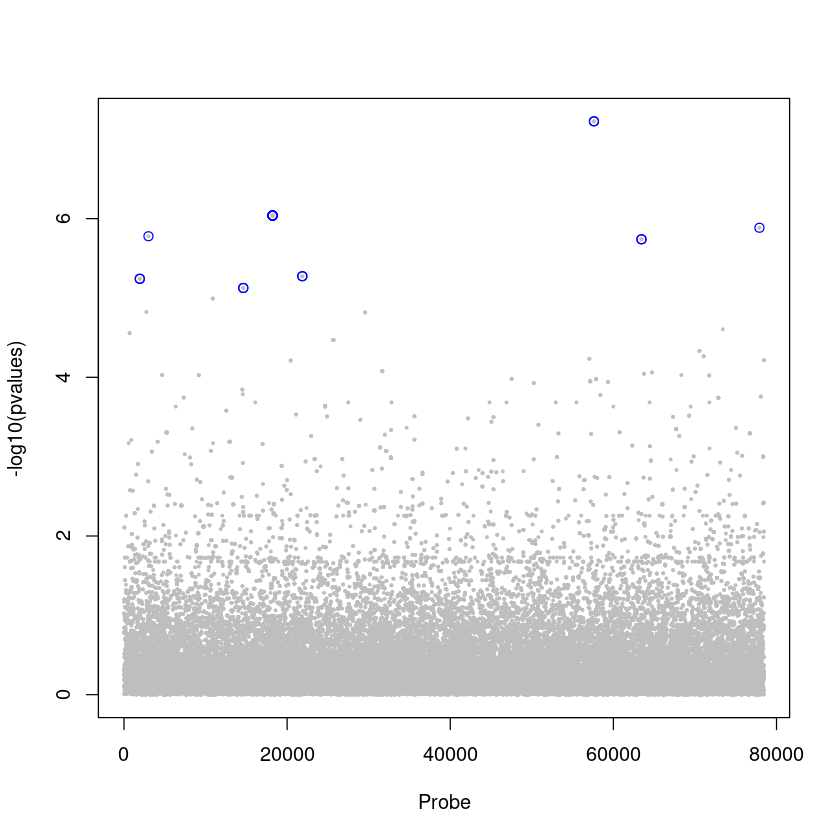

In [84]:
pv <- lfmm_test(Y = snpmatrix[1:40,],
                X = scale(as.numeric(as.matrix(var))),
                lfmm = mod.lfmm,
                calibrate = "gif")

## Manhattan plot with true associations shown
pvalues <- pv$calibrated.pvalue
plot(-log10(pvalues),
     pch = 19,
     cex = .3,
     xlab = "Probe",
     col = "grey")

th <- which(-log10(pvalues) > 5)
points(th,
       -log10(pvalues)[th],
        col = "blue")

In [31]:
manhattan(x= pv$)

In [89]:
nmap = c()
for( i in th){
    if( i%%2 == 0){
     nmap <- append(i/2, nmap)   
    }else{
        nmap <- append((i+1)/2, nmap)
    }
}

In [90]:
nmap

[1] 38953 31722 31722 28808 28808 10932 10932  9109  9109  9108  9108  9107
[13]  9107  9106  9106  7312  7312  1500   969   969

In [91]:
-log10(pvalues)[th]

[1] 5.242023 5.242023 5.778343 5.126205 5.126205 6.038763 6.038763 6.038763
 [9] 6.038763 6.038763 6.038763 6.038763 6.038763 5.274105 5.274105 7.226432
[17] 7.226432 5.739448 5.739448 5.884997

In [186]:
qqdata <- data.frame(mm$ID,mm$CHROM, 1, pvalues)
colnames(qqdata) <- c("SNP","CHR","BP","P")

In [187]:
rmp = data.frame(CHROM =unique(mm$CHROM) , N =  1:661)
frmp = as.data.frame(table(qqdata$CHR))
#rmp

In [188]:
num <- c()
for( i in 1:length(rmp$CHROM)){
    qqdata$CHR <- gsub(rmp$CHROM[i], rmp$N[i], qqdata$CHR, fixed = TRUE)
    num <- append(1:frmp$Freq[i],num)    
}

num <- rev(num)
qqdata$CHR <- as.numeric(qqdata$CHR)
qqdata$BP <- num

In [197]:
qqdata <- na.omit(qqdata)
head(qqdata)

,SNP,CHR,BP,P
,<chr>,<dbl>,<int>,<dbl>
1,175:229:-,1,2,0.55221853
2,175:229:-,1,1,0.55221853
4,795:35:-,2,1,0.06759273
5,1548:24:+,3,20,0.48672860
6,1548:24:+,3,19,0.48672860
7,1548:28:+,3,18,0.78428248


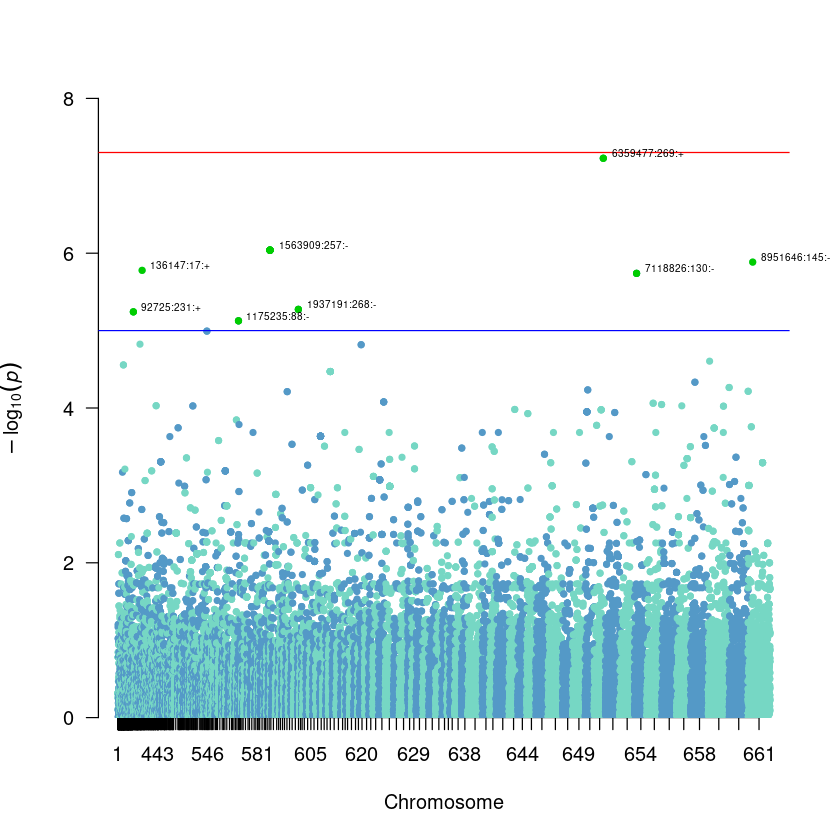

In [216]:
library(viridisLite)
library(viridis)
manhattan(qqdata, highlight = vcfResult$ID, annotatePval = 0.00001, col = c("#76D7C4","#5499C7"))

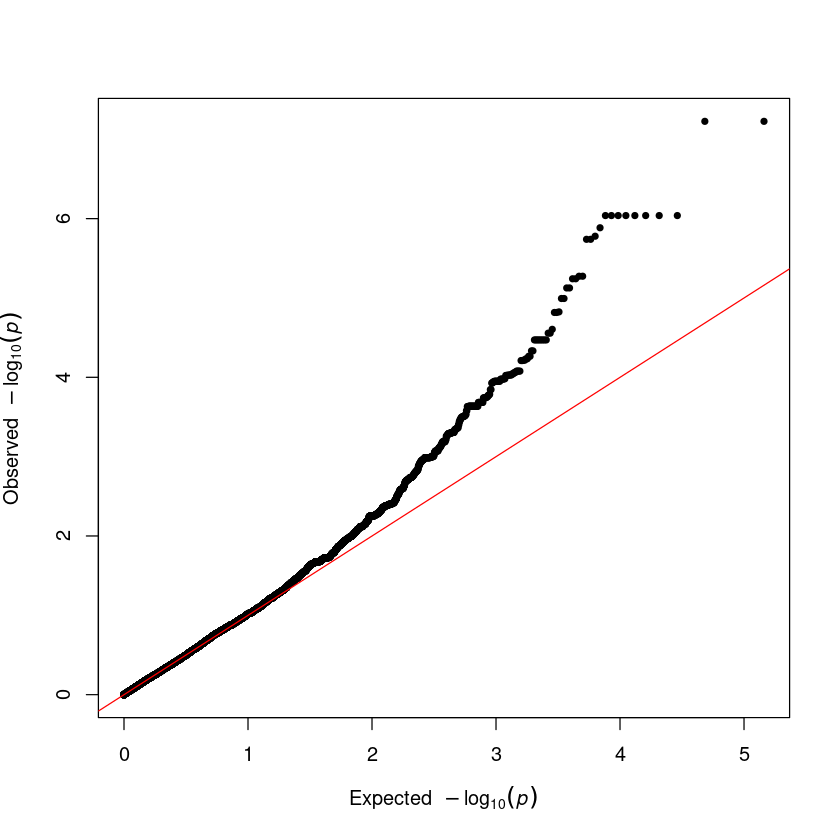

In [209]:
qq(qqdata$P)

In [472]:
smap <- 'fgrep -v "##" cv_maxmissing0.5.recode.vcf | sed "s/#//g" > vcf.tsv'
system(smap)

In [199]:
vcf <- read.table("vcf.tsv", header = TRUE)

In [200]:
vcfResult <- as.data.frame(vcf[nmap,])


In [201]:
vcfResult$ID

[1] "8951646:145:-" "7118826:130:-" "7118826:130:-" "6359477:269:+"
 [5] "6359477:269:+" "1937191:268:-" "1937191:268:-" "1563909:257:-"
 [9] "1563909:257:-" "1563909:220:-" "1563909:220:-" "1563909:124:-"
[13] "1563909:124:-" "1563909:31:-"  "1563909:31:-"  "1175235:88:-" 
[17] "1175235:88:-"  "136147:17:+"   "92725:231:+"   "92725:231:+"

In [525]:
write.table(vcfResult, "snp.vcf", col.names = FALSE, row.names = FALSE)

In [526]:
format <- 'fgrep "#" cv_maxmissing0.5.recode.vcf > snp_format.vcf'
system(format)


```bash 
    ## run in terminal
    sed "s/\" \"/\t/g" snp.vcf| sed "s/\"//g"  >> snp_format.vc
```

#### the file was import to:  https://www.ensembl.org/info/docs/tools/vep/index.html 

web interface
insert vcf file

In [33]:
library(maptools)
library(raster)
library(tiff)
library(ggplot2)
library(dplyr)
library(gridExtra)

#### Download eviromental data from: 

Bio factors download:
https://biogeo.ucdavis.edu/data/worldclim/v2.1/base/wc2.1_2.5m_bio.zip   
more informations of variables in: https://www.worldclim.org/data/bioclim.html

Elevations data:
https://biogeo.ucdavis.edu/data/worldclim/v2.1/base/wc2.1_2.5m_elev.zip

In [3]:
setwd(dir = "Maps/")
str_name_elv<-'wc2.1_2.5m_elev.tif'
str_name_bio1 <- 'wc2.1_2.5m_bio_1.tif'
str_name_bio4 <- 'wc2.1_2.5m_bio_4.tif'
str_name_bio7 <- 'wc2.1_2.5m_bio_7.tif'

imported_raster_elev=raster(str_name_elv)
imported_raster_bio1=raster(str_name_bio1)
imported_raster_bio4=raster(str_name_bio4)
imported_raster_bio7=raster(str_name_bio7)

In [4]:
elev <- rasterToPoints(imported_raster_elev, spatial = TRUE)
bio1 <- rasterToPoints(imported_raster_bio1, spatial = TRUE)
bio4 <- rasterToPoints(imported_raster_bio4, spatial = TRUE)
bio7 <- rasterToPoints(imported_raster_bio7, spatial = TRUE)
# Then to a 'conventional' dataframe
elev_df  <- data.frame(elev)
bio1_df  <- data.frame(bio1)
bio4_df  <- data.frame(bio4)
bio7_df  <- data.frame(bio7)

In [5]:
colecta <- read.table("../Datos_de_colecta_40_muestras.csv", sep = ",", header = TRUE)

In [6]:
head(colecta)

,Codigo.campo,cod,Color,Departamento,Provincia,Distrito,Latitud..S.,Longitud..O.,Latitud..S..1,Longitud..O..1,Elevación..msnm.
,<chr>,<chr>,<chr>,<chr>,<chr>,<chr>,<dbl>,<dbl>,<chr>,<chr>,<int>
1,CP-315,2326,N,Raza Inti,Lima,Lima,-12.07654,-76.94466,0,0,20
2,CP-351,2328,N,Raza Peru,Lima,Lima,-12.07654,-76.94466,0,0,20
3,CP-397,3200,N,Raza Andina,Lima,Lima,-12.07654,-76.94466,0,0,20
4,CP-905,CP-0,BA/NA,Apurímac,Andahuaylas,José María Arguedas,-13.79485,-73.36869,"13º 47' 41.471""","73º 22' 7.28""",3800
5,CP-928,CP-0,RN,Apurímac,Andahuaylas,José María Arguedas,-13.79485,-73.36869,"13º 47' 41.471""","73º 22' 7.28""",3800
6,CP-929,CP-0,RN,Apurímac,Andahuaylas,José María Arguedas,-13.79485,-73.36869,"13º 47' 41.471""","73º 22' 7.28""",3800


In [7]:
xy=data.frame(X=colecta$Latitud..S., Y = colecta$Longitud..O., DEP = colecta$Departamento)

In [8]:

elev_df_peru <- elev_df %>% dplyr::filter(x > -85 & x < -65) %>%
                                        dplyr::filter(y > -18 & y < 0)

bio1_df_peru <- bio1_df %>% dplyr::filter(x > -85 & x < -65) %>%
                                        dplyr::filter(y > -18 & y < 0)

bio4_df_peru <- bio4_df %>% dplyr::filter(x > -85 & x < -65) %>%

                                        dplyr::filter(y > -18 & y < 0)
bio7_df_peru <- bio7_df %>% dplyr::filter(x > -85 & x < -65) %>%
                                        dplyr::filter(y > -18 & y < 0)

In [9]:
elv <- ggplot() +
    geom_raster(data = elev_df_peru , aes(x = x, y = y, fill = wc2.1_2.5m_elev)) + 
    geom_point(data=xy, aes(x=Y, y=X, fill=NULL), color = "red")+
    coord_equal()

b1 <- ggplot() +
    geom_raster(data = bio1_df_peru , aes(x = x, y = y, fill = wc2.1_2.5m_bio_1)) + 
    geom_point(data=xy, aes(x=Y, y=X, fill=NULL), color = "red")+
    coord_equal()

b4 <- ggplot() +
    geom_raster(data = bio4_df_peru , aes(x = x, y = y, fill = wc2.1_2.5m_bio_4)) + 
    geom_point(data=xy, aes(x=Y, y=X, fill=NULL), color = "red")+
    coord_equal()

b7 <- ggplot() +
    geom_raster(data = bio7_df_peru , aes(x = x, y = y, fill = wc2.1_2.5m_bio_7)) + 
    geom_point(data=xy, aes(x=Y, y=X, fill=NULL), color = "red")+
    coord_equal()

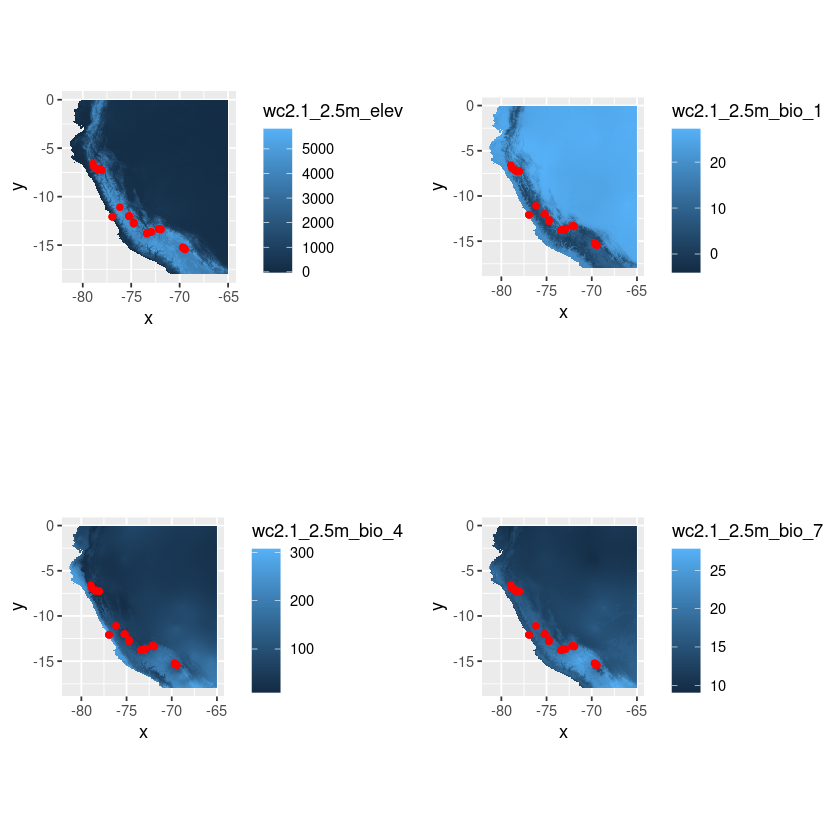

In [10]:
grid.arrange(elv, b1, b4, b7, nrow = 2)

In [ ]:
ensmbl <- read.table("7V0KcSlHvwJ8Ejbr.vep.txt", header = FALSE)
head(ensmbl)

In [222]:
## install.packages("poolfstat")
library(poolfstat)
library(rgdal)
library(maps)
library(dismo)
library(maxnet)
library(maptools)

In [225]:
currentEnv=getData("worldclim", var="bio", res=10)
#predictions for 2070
futureEnv=getData('CMIP5', var='bio', res=10, rcp=85, model='HE', year=70)
names(futureEnv)=names(currentEnv)
#limit bioclimactic predictors
currentEnv=dropLayer(currentEnv, c("bio2", "bio3", "bio4", "bio10", "bio11", "bio13", "bio14", "bio15" ))
futureEnv=dropLayer(futureEnv, c("bio2", "bio3", "bio4", "bio10", "bio11", "bio13", "bio14", "bio15" ))

In [ ]:
model.extent<-extent(-130,-60,25,50) #numbers are for map of continental US
modelEnv=crop(currentEnv,model.extent)
modelFutureEnv=crop(futureEnv, model.extent)